In [1]:
# Import required libraries
import os
import tarfile
import urllib

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

NameError: name 'HOUSING_URL' is not defined

In [3]:
# Retrieve housing data
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

NameError: name 'fetch_housing_data' is not defined

In [6]:
# Load data using Pandas
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    

In [7]:
# Take a quick look at the dataset
housing = load_housing_data()


In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# info() method can get quick descrition of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# From the above descripton, there are 10 atrributes out of which 9 are numerical and one is categorical

# To find out what categories exist in categorical attribute use

housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
# describe() method shows the summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# Another quick way to get feel for numerical data is to plot a Histogram

# A histogram shows the number of instances on the vertical axis that have a given range on the horizontal axis.
# A graphical representation of the distribution of a dataset, 
# showing the frequency of observations within different intervals or bins.

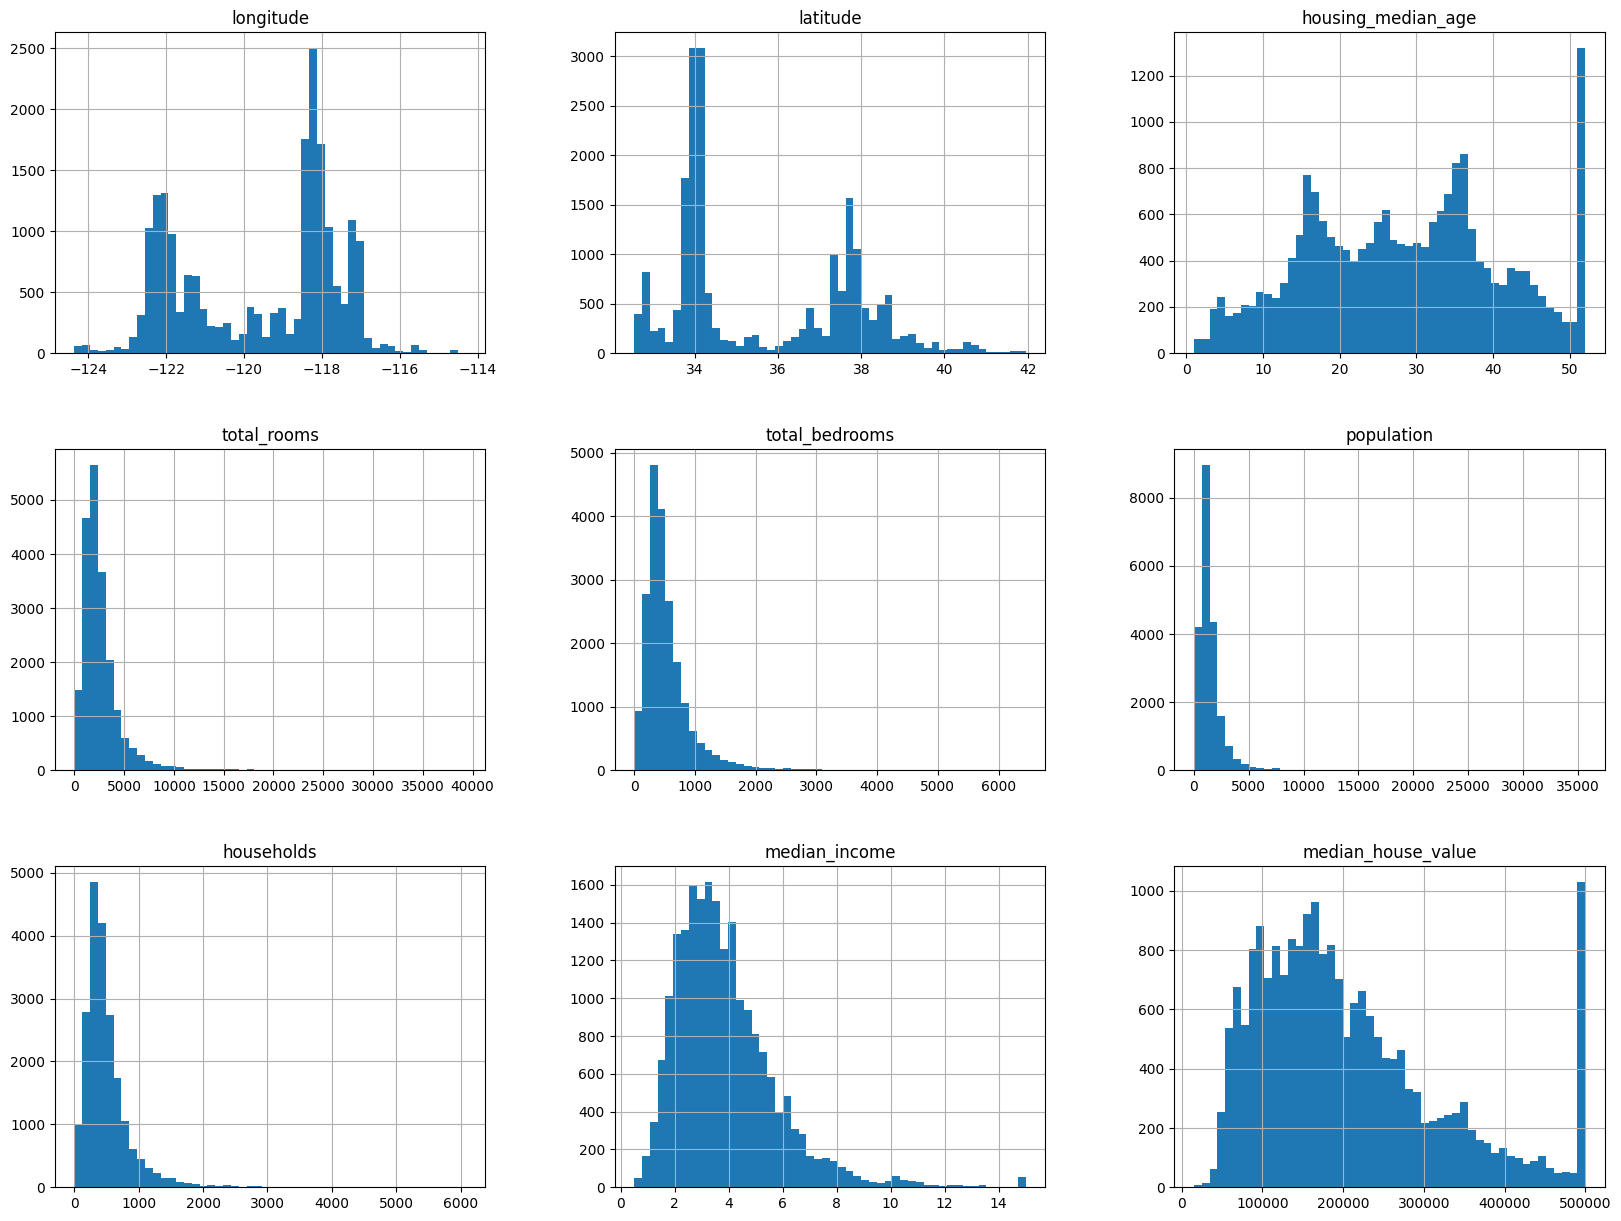

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# Looking at the data, median_income is capped at 15 , median_house_value is capped at 500,000 and housing_median_age are also capped.
# Many histograms are tail heavy, which means they extend farther right to the median.Skewed data.
# It becomes complex for ML algs to capture more generalized pattern and may tend to overfit.

# To mitigate this, options are to may be delete outliers, log transformations and resampling strategies may be useful

In [15]:
# Create Test set using random sampling.
# One issue with this is this may not representative of overall population if dataset is particularly small.
# Introduces Sampling bias for smaller datasets.

import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42) # to generate same set always
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_set_indices = shuffled_indices[:test_set_size] # till 0 to test_set_size-1
    train_set_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_set_indices], data.iloc[test_set_indices]
    


In [16]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"train_set length {len(train_set)}")
print(f"test_set length {len(test_set)}")

train_set length 16512
test_set length 4128


In [17]:
# Set test set aside and copy train set
housing = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

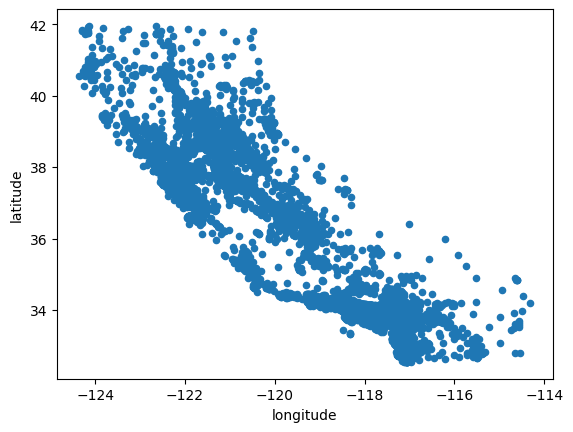

In [18]:
# Visualize geographical Data

housing.plot(kind="scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

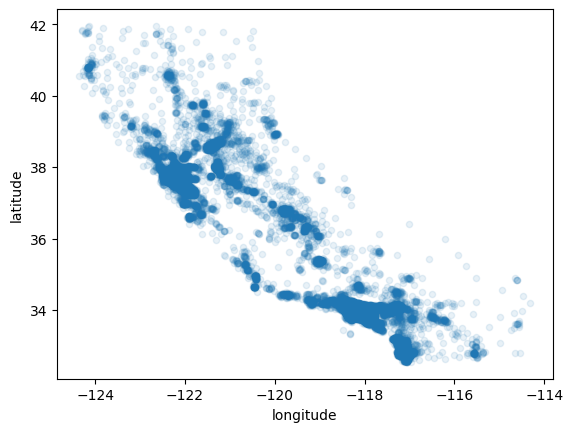

In [19]:
# Above plot looks like CA, and from the housing dataset each row represents the district.

housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

# Setting alpha=0.1 helps to observe the high density areas, Bay area, LA and San Diego

House prices are very much related to ocean proximity and population density.House near to ocean are priced high


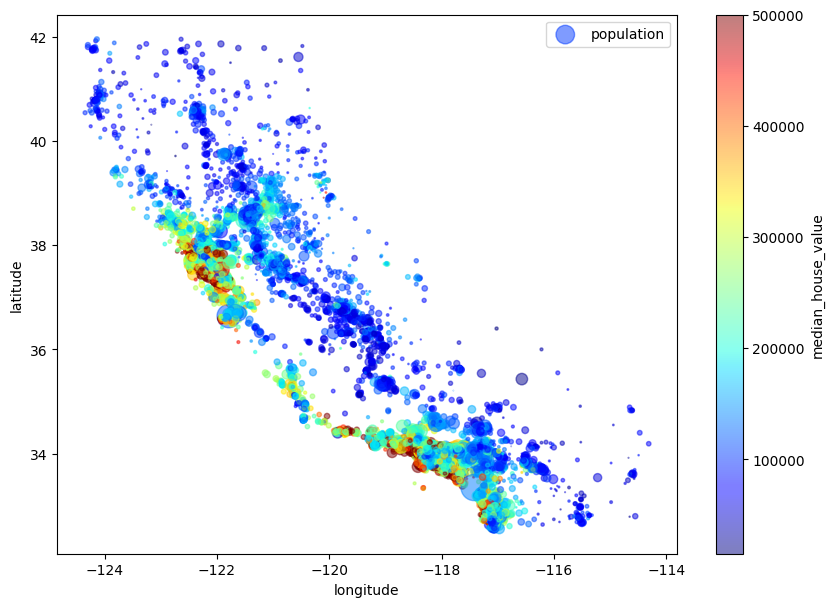

In [20]:
# Show distric population and median_house_value

housing.plot(kind="scatter", x = "longitude", y = "latitude", 
             alpha = 0.5,
             s = housing["population"]/100, label = "population", figsize=(10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

print("House prices are very much related to ocean proximity and population density.House near to ocean are priced high")

In [21]:
# After visualization, it is helpful to find the standard correlation between each and every pair of attributes 
# as there are not many attributes.

# Pearson's r - standard correlation measures the linear relationship between two attributes.Ranges from -1 to 1.
# -1 is strong negative correlation
# 1 is strong positive correlation
# 0 is no linear relation.


numerical_attributes_data = housing.select_dtypes(include='number')
print(type(numerical_attributes_data))

corr_matrix = numerical_attributes_data.corr()

# each attribute correlation with medain_house_value - target label

corr_matrix["median_house_value"].sort_values(ascending = False)



<class 'pandas.core.frame.DataFrame'>


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

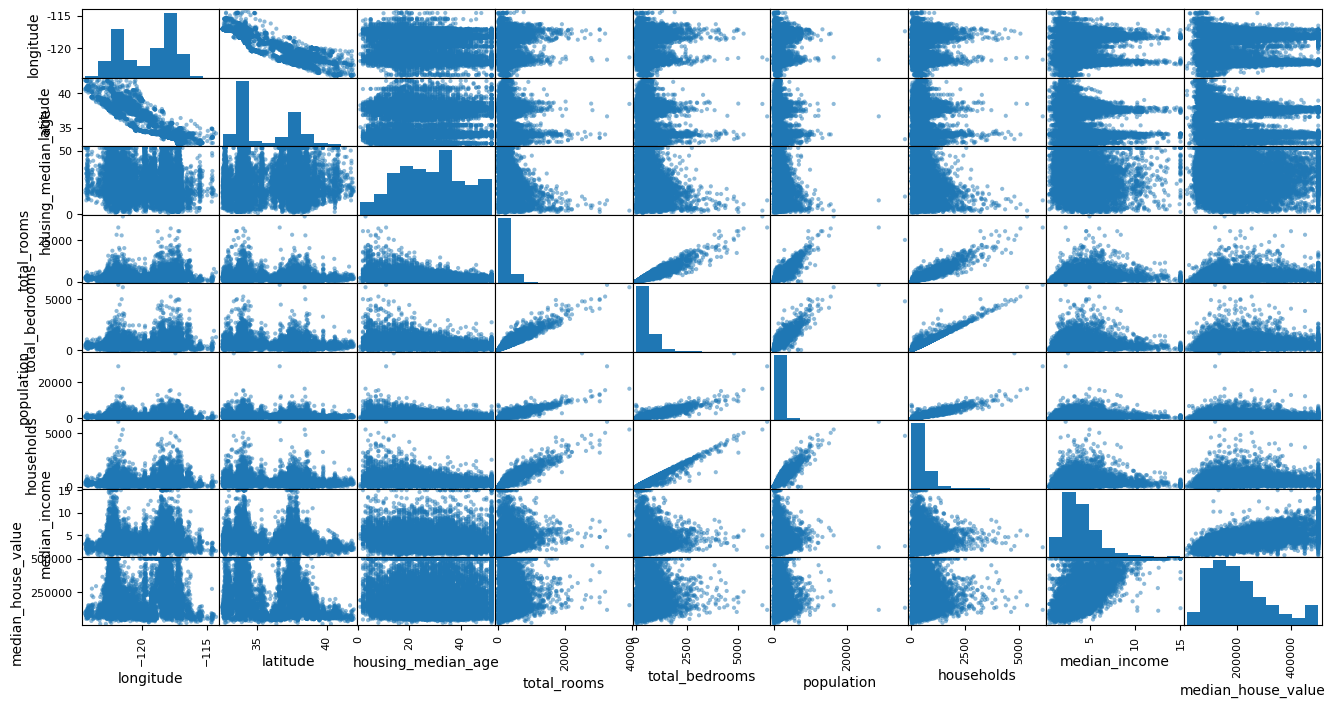

In [22]:
# median_house_value has +ve correlation with median_income

# Samething can be visualized by using pandas scatter_matrix - 
# Plots every numerical attribute with every other numerical attribure

from pandas.plotting import scatter_matrix

numerical_column_names = housing.select_dtypes(include='number').columns.tolist()


scatter_matrix(housing[numerical_column_names], figsize=(16,8))
plt.show()

    

<Axes: xlabel='median_income', ylabel='median_house_value'>

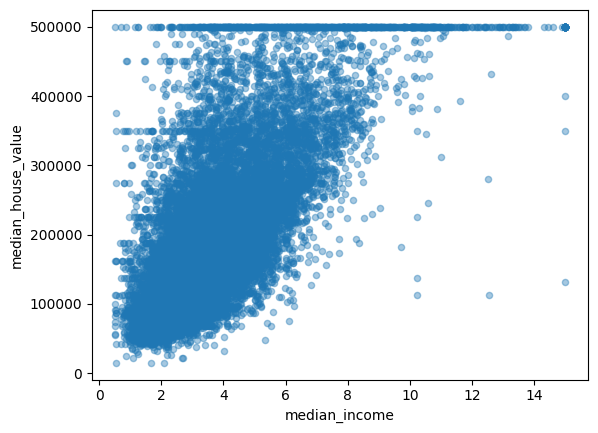

In [23]:
# looking at the plots, median_house_value has positive correlation with median_income

housing.plot(kind="scatter", y = "median_house_value", x = "median_income", alpha = 0.4)

In [24]:
# From the above plot house values are capped at 500K

# If there are any tail heavy distributions, we can transform that kind of attributes by doing a log transformations.


In [25]:
# Trying different attribute combinations - Feature engineering to come up with new useful features.

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] # rooms per household
housing["population_per_household"] = housing["population"] / housing["households"] # population per household


In [26]:
numerical_attributes_data = housing.select_dtypes(include='number')
corr_matrix = numerical_attributes_data.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
Name: median_house_value, dtype: float64

In [27]:
# Prepare data for ML model

# Separate predictors(independent varaibles) and labels(target varaibles)

housing = train_set.drop("median_house_value", axis = 1)

housing_labels = train_set["median_house_value"].copy()


In [28]:
# Data Cleaning
# 1. Handling missing features - total_bedrooms attribute has some missing values. total_bedrooms      20433

# Calculate median total_bedrooms median and assign the value to missing values.

# Need this same median value - to use in test set
median = housing["total_bedrooms"].median()

print(f"median value for total_bedrooms {median}")

housing["total_bedrooms"].fillna(median, inplace = True)

median value for total_bedrooms 437.0


In [29]:
from sklearn.impute import SimpleImputer

# SimpleImputer is a handy class for replacing missing values

In [30]:
imputer = SimpleImputer(strategy = "median")

In [31]:
housing_num = housing.drop("ocean_proximity", axis = 1)


In [32]:
imputer.fit(housing_num) # calculated median of all numerical attributes

imputer.statistics_

housing_num.median().values

imputer.transform(housing_num) # transforms the dataset


array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  3.2596e+00],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8125e+00],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  4.1563e+00],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.9344e+00],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  5.7192e+00],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  2.5755e+00]])

In [33]:
X = imputer.fit_transform(housing_num)
imputer.statistics_

# Check the public members - hyper parameters
imputer.strategy

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

In [34]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [41]:
# OridinalEncoder and OneHotEncoder are used to transform categorical variables

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
non_zero_values = housing_cat_1hot.data
row_indices, col_indices = housing_cat_1hot.nonzero()

for value, row, col in zip(non_zero_values, row_indices, col_indices):
    print(f"Value : {value}, Position : ({row}, {col})")

Value : 1.0, Position : (0, 4)
Value : 1.0, Position : (1, 4)
Value : 1.0, Position : (2, 4)
Value : 1.0, Position : (3, 4)
Value : 1.0, Position : (4, 1)
Value : 1.0, Position : (5, 0)
Value : 1.0, Position : (6, 0)
Value : 1.0, Position : (7, 3)
Value : 1.0, Position : (8, 0)
Value : 1.0, Position : (9, 0)
Value : 1.0, Position : (10, 3)
Value : 1.0, Position : (11, 0)
Value : 1.0, Position : (12, 1)
Value : 1.0, Position : (13, 0)
Value : 1.0, Position : (14, 0)
Value : 1.0, Position : (15, 0)
Value : 1.0, Position : (16, 0)
Value : 1.0, Position : (17, 1)
Value : 1.0, Position : (18, 0)
Value : 1.0, Position : (19, 0)
Value : 1.0, Position : (20, 1)
Value : 1.0, Position : (21, 0)
Value : 1.0, Position : (22, 0)
Value : 1.0, Position : (23, 0)
Value : 1.0, Position : (24, 1)
Value : 1.0, Position : (25, 3)
Value : 1.0, Position : (26, 1)
Value : 1.0, Position : (27, 0)
Value : 1.0, Position : (28, 0)
Value : 1.0, Position : (29, 0)
Value : 1.0, Position : (30, 0)
Value : 1.0, Posit

In [48]:
# Feature scaling - MinMax scaler vs StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler())
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])


In [49]:
# Input data is prepared - Preprocessed and ready to be fed to ML model
housing_prepared = full_pipeline.fit_transform(housing)